Corrupt JPEG data: premature end of data segment
libpng warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: bad Huffman code


Iteration 1, loss = 4.16515111
Iteration 2, loss = 4.07640256
Iteration 3, loss = 4.03801781
Iteration 4, loss = 4.00464966
Iteration 5, loss = 3.98289303
Iteration 6, loss = 3.96334896
Iteration 7, loss = 3.95156439
Iteration 8, loss = 3.92999046
Iteration 9, loss = 3.91902245
Iteration 10, loss = 3.90935640
Iteration 11, loss = 3.89931321
Iteration 12, loss = 3.88708166
Iteration 13, loss = 3.87368966
Iteration 14, loss = 3.86463631
Iteration 15, loss = 3.85603369
Iteration 16, loss = 3.84387405
Iteration 17, loss = 3.82757897
Iteration 18, loss = 3.81876916
Iteration 19, loss = 3.80729615
Iteration 20, loss = 3.80087989
Iteration 21, loss = 3.78619726
Iteration 22, loss = 3.77647378
Iteration 23, loss = 3.76826657
Iteration 24, loss = 3.75723417
Iteration 25, loss = 3.74134047
Iteration 26, loss = 3.73592915
Iteration 27, loss = 3.72183696
Iteration 28, loss = 3.71247823
Iteration 29, loss = 3.70436893
Iteration 30, loss = 3.69533462
Iteration 31, loss = 3.68829401
Iteration 32, los

/home/sevvalizmirli/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sevvalizmirli/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sevvalizmirli/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sev

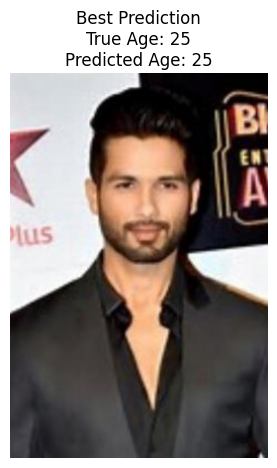

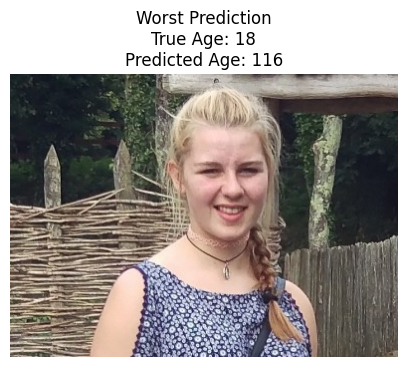

In [2]:
import cv2
import numpy as np
import os
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib

folder_paths = [
    '/home/sevvalizmirli/Desktop/Computer Vision/Dataset/UTKFace_part1/',
    '/home/sevvalizmirli/Desktop/Computer Vision/Dataset/UTKFace_part2/',
    '/home/sevvalizmirli/Desktop/Computer Vision/Dataset/UTKFace_part3/',
    '/home/sevvalizmirli/Desktop/Computer Vision/Dataset/UTKFace_part4/'
]

def preprocess_and_extract_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None, None
    image = cv2.resize(image, (128, 128))  # Resize for uniformity
    image = cv2.medianBlur(image, 5)  # Median filtering
    image = cv2.equalizeHist(image)  # Histogram equalization
    fd = hog(image, orientations=8, pixels_per_cell=(16, 16),
             cells_per_block=(1, 1), visualize=False, feature_vector=True)
    return fd

feature_vectors, age_labels, image_paths = [], [], []

for folder_path in folder_paths:
    for image_file in os.listdir(folder_path):
        if image_file.endswith('.jpg'):
            image_path = os.path.join(folder_path, image_file)
            fd = preprocess_and_extract_features(image_path)
            if fd is not None:
                feature_vectors.append(fd)
                age_label = int(image_file.split('_')[0])
                age_labels.append(age_label)
                image_paths.append(image_path)  # Store image path for later visualization

# Split the data
X_train, X_test, y_train, y_test, paths_train, paths_test = train_test_split(
    feature_vectors, age_labels, image_paths, test_size=0.2, random_state=42
)

# Train the MLP model
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, verbose=True)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, predictions))

# Find the best and worst predictions
errors = np.abs(y_test - predictions)
best_pred_idx = np.argmin(errors)
worst_pred_idx = np.argmax(errors)

def show_image(image_path, title):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Show best and worst predictions
show_image(paths_test[best_pred_idx], f'Best Prediction\nTrue Age: {y_test[best_pred_idx]}\nPredicted Age: {predictions[best_pred_idx]}')
show_image(paths_test[worst_pred_idx], f'Worst Prediction\nTrue Age: {y_test[worst_pred_idx]}\nPredicted Age: {predictions[worst_pred_idx]}')


Corrupt JPEG data: premature end of data segment
libpng warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: bad Huffman code


Iteration 1, loss = 4.16122487
Iteration 2, loss = 4.06302141
Iteration 3, loss = 4.02034552
Iteration 4, loss = 3.99710433
Iteration 5, loss = 3.97529921
Iteration 6, loss = 3.95766154
Iteration 7, loss = 3.93979692
Iteration 8, loss = 3.92985076
Iteration 9, loss = 3.91190591
Iteration 10, loss = 3.90066475
Iteration 11, loss = 3.89216230
Iteration 12, loss = 3.87705658
Iteration 13, loss = 3.86603672
Iteration 14, loss = 3.85978109
Iteration 15, loss = 3.84779688
Iteration 16, loss = 3.83404866
Iteration 17, loss = 3.82364862
Iteration 18, loss = 3.80906595
Iteration 19, loss = 3.80893032
Iteration 20, loss = 3.79897198
Iteration 21, loss = 3.78083877
Iteration 22, loss = 3.77090762
Iteration 23, loss = 3.75761528
Iteration 24, loss = 3.74821583
Iteration 25, loss = 3.73367776
Iteration 26, loss = 3.72729841
Iteration 27, loss = 3.71473777
Iteration 28, loss = 3.70306140
Iteration 29, loss = 3.69431978
Iteration 30, loss = 3.67920768
Iteration 31, loss = 3.67299049
Iteration 32, los

/home/sevvalizmirli/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sevvalizmirli/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sevvalizmirli/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


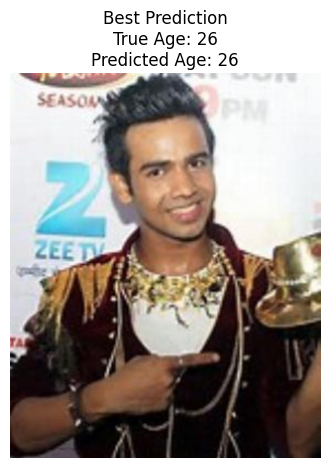

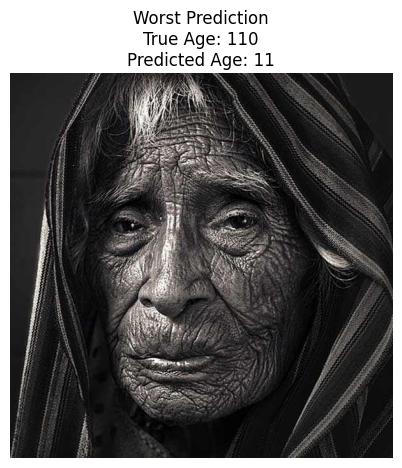

In [3]:
import cv2
import numpy as np
import os
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib

folder_paths = [
    '/home/sevvalizmirli/Desktop/Computer Vision/Dataset/UTKFace_part1/',
    '/home/sevvalizmirli/Desktop/Computer Vision/Dataset/UTKFace_part2/',
    '/home/sevvalizmirli/Desktop/Computer Vision/Dataset/UTKFace_part3/',
    '/home/sevvalizmirli/Desktop/Computer Vision/Dataset/UTKFace_part4/'
]

def preprocess_and_extract_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None
    image = cv2.resize(image, (128, 128))
    image = cv2.medianBlur(image, 5)
    image = cv2.equalizeHist(image)
    fd, _ = hog(image, orientations=8, pixels_per_cell=(16, 16),
                cells_per_block=(1, 1), visualize=True, feature_vector=True)
    return fd

feature_vectors, age_labels, image_paths = [], [], []

for folder_path in folder_paths:
    for image_file in os.listdir(folder_path):
        if image_file.endswith('.jpg'):
            image_path = os.path.join(folder_path, image_file)
            fd = preprocess_and_extract_features(image_path)
            if fd is not None:
                feature_vectors.append(fd)
                age_label = int(image_file.split('_')[0])
                age_labels.append(age_label)
                image_paths.append(image_path)

X_train, X_test, y_train, y_test, paths_train, paths_test = train_test_split(
    feature_vectors, age_labels, image_paths, test_size=0.2, random_state=42
)

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, verbose=True)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, predictions))

errors = np.abs(y_test - predictions)
best_pred_idx = np.argmin(errors)
worst_pred_idx = np.argmax(errors)

def show_image(image_path, title):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image(paths_test[best_pred_idx], f'Best Prediction\nTrue Age: {y_test[best_pred_idx]}\nPredicted Age: {predictions[best_pred_idx]}')
show_image(paths_test[worst_pred_idx], f'Worst Prediction\nTrue Age: {y_test[worst_pred_idx]}\nPredicted Age: {predictions[worst_pred_idx]}')
